# Stock Market Analysis Project




We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. This project is mainly just to practice my skills with matplotlib, pandas, and numpy. Don't infer financial trading advice from the analysis .
### Part 0: Import




In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)



In [16]:
tesla=pd.read_csv('Tesla_Stock.csv',index_col='Date')

In [44]:
tesla.index=pd.to_datetime(tesla.index)

In [45]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


### Other Car Companies

** Repeated the same steps to grab data for Ford and GM (General Motors), **

In [18]:
ford=pd.read_csv('Ford_Stock.csv',index_col='Date')

In [46]:
ford.index=pd.to_datetime(ford.index)

In [19]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [20]:
gm=pd.read_csv('GM_Stock.csv',index_col='Date')

In [47]:
gm.index=pd.to_datetime(gm.index)

In [21]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


## Part 2: Visualizing the Data

** Time to visualize the data. **



____

** Linear plot of all the stocks' Open price **

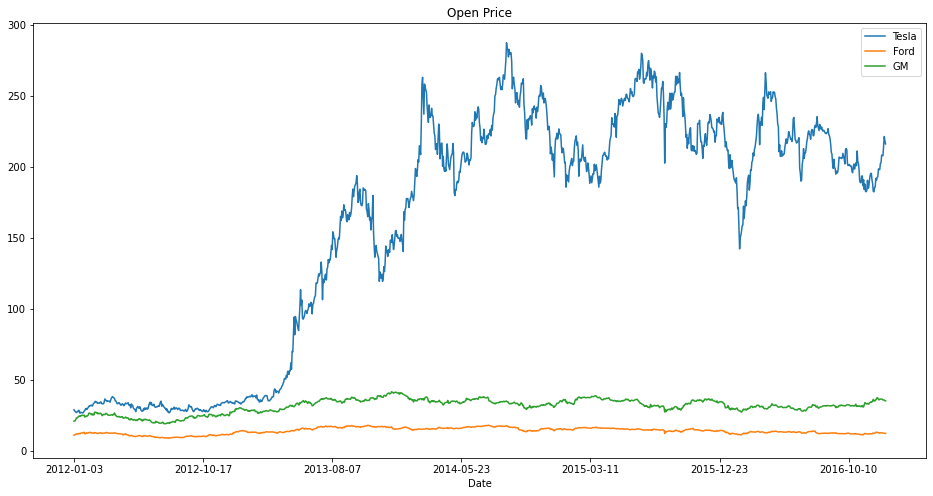

In [37]:

tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
ford['Open'].plot(label='Ford')
gm['Open'].plot(label='GM')
plt.legend()

____

** Plot of the Volume of stock traded each day.**

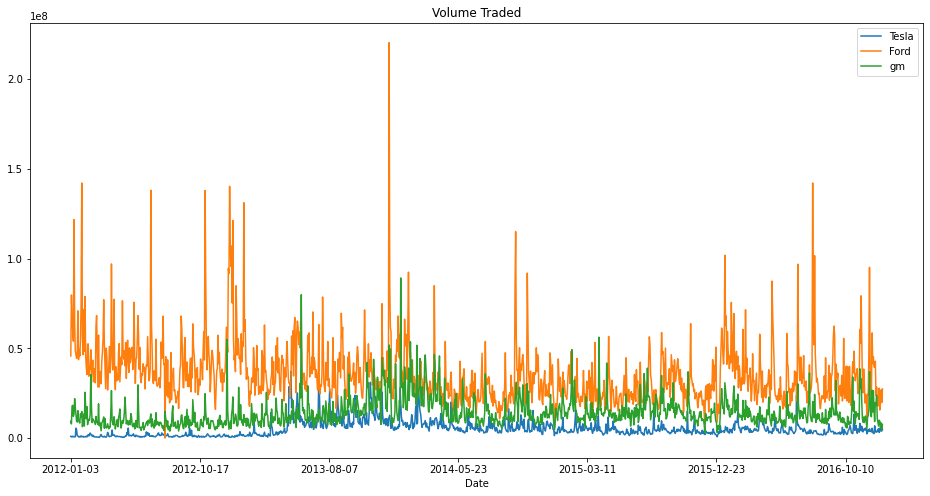

In [39]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
ford['Volume'].plot(label='Ford')
gm['Volume'].plot(label='gm')
plt.legend()

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**



In [55]:
ford.Volume.idxmax()

Timestamp('2013-12-18 00:00:00')

____

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10  each versus 100000 units of stock at $1  each)**

**  New column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [56]:
tesla['Total Traded']=tesla.Open*tesla.Volume

In [57]:
ford['Total Traded']=ford.Open*ford.Volume
gm['Total Traded']=gm.Open*gm.Volume

** Plot of "Total Traded" against the time index.**

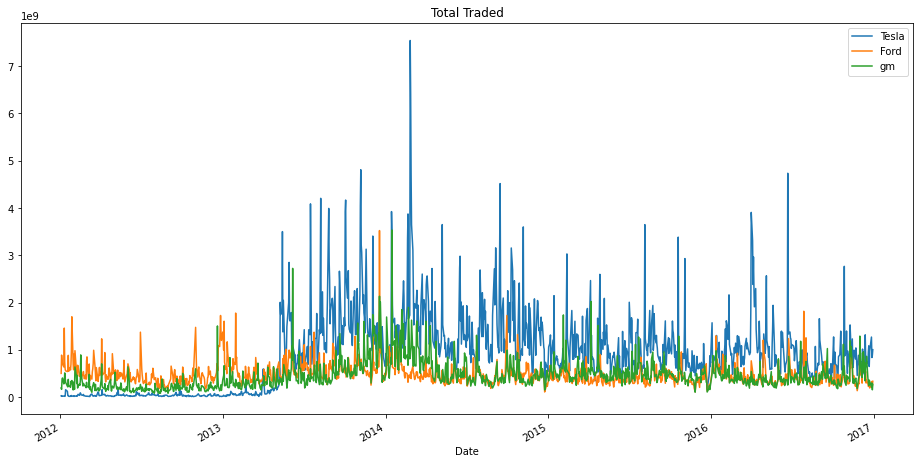

In [58]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8),title='Total Traded')
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='gm')
plt.legend()

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [60]:
tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

In [61]:
# http://money.cnn.com/2014/02/25/investing/tesla-record-high/
# https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/
# https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/
# http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

____

**  Plot of the MA50 and MA200 for GM. **

<AxesSubplot:xlabel='Date'>

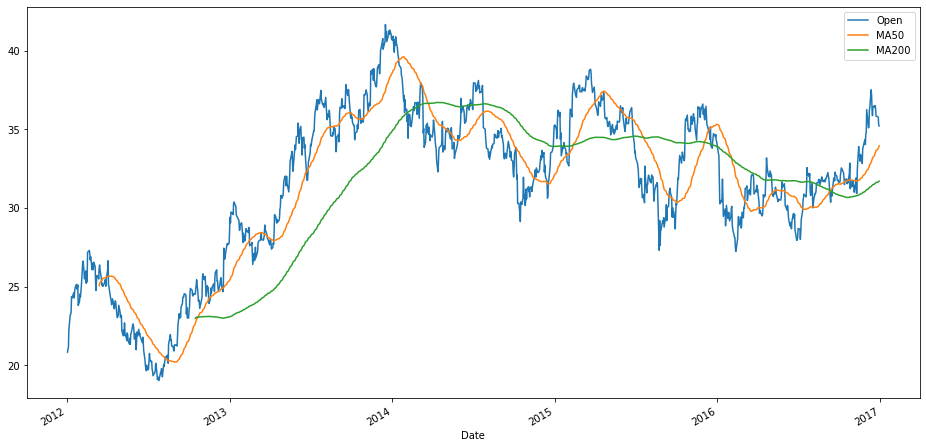

In [63]:
gm['MA50']=gm['Open'].rolling(50).mean()
gm['MA200']=gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot.**

In [64]:
from pandas.plotting import scatter_matrix

In [65]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [66]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

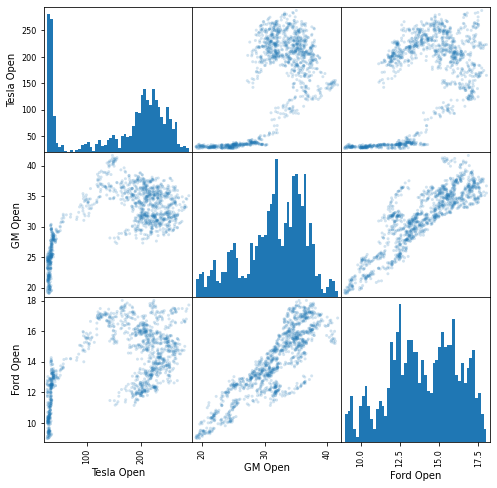

In [67]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});


** Created a CandleStick chart for Ford in January 2012 (too many dates won't look good for a candlestick chart)**

In [74]:
pip install mpl_finance


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [75]:
import mpl_finance

/Users/Shared/anaconda3/lib/python3.9/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


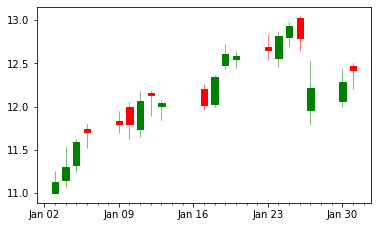

In [76]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
ford_reset = ford.loc['2012-01':'2012-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

____
# Part 3: Basic Financial Analysis



## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [77]:
tesla['returns'] = tesla['Close'].pct_change(1)
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [78]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [79]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


In [80]:
gm.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


** Now we plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? 

<AxesSubplot:>

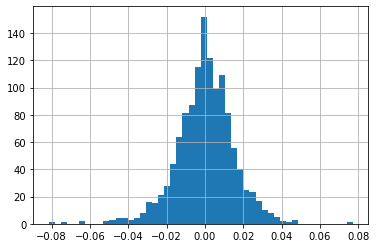

In [81]:
ford['returns'].hist(bins=50)

<AxesSubplot:>

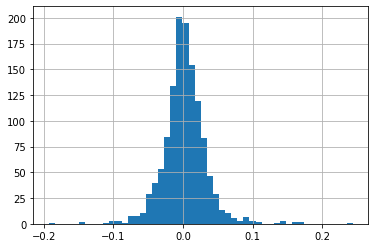

In [82]:
tesla['returns'].hist(bins=50)

<AxesSubplot:>

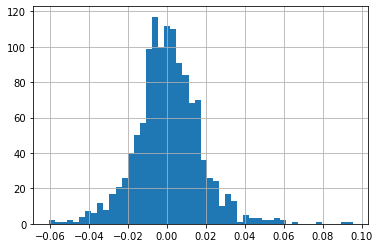

In [83]:
gm['returns'].hist(bins=50)

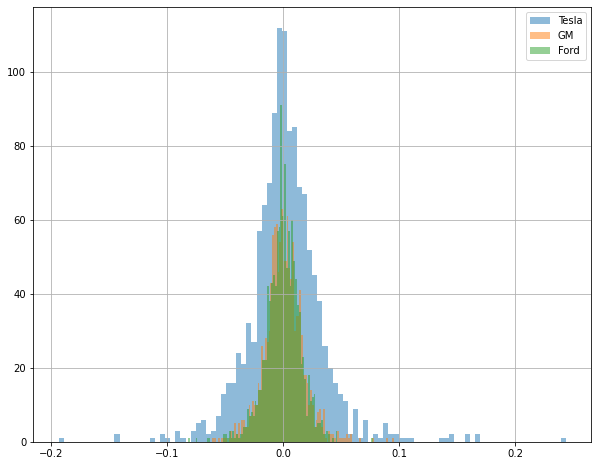

In [84]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

** KDE plot**

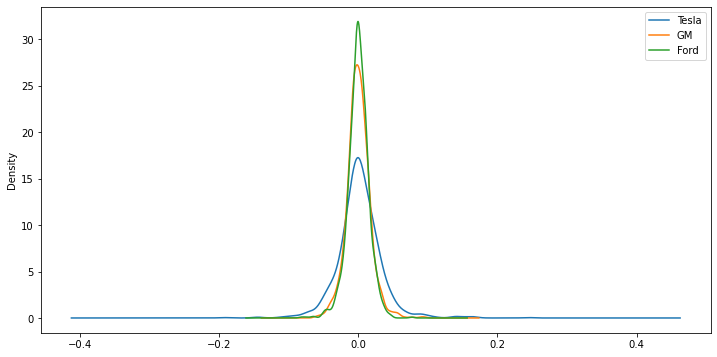

In [85]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

** box plots comparing returns **

<AxesSubplot:>

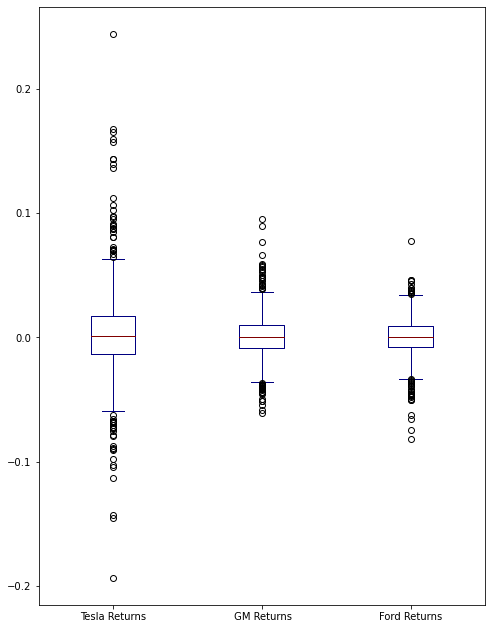

In [86]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparing Daily Returns between Stocks

** How related are these car companies?**

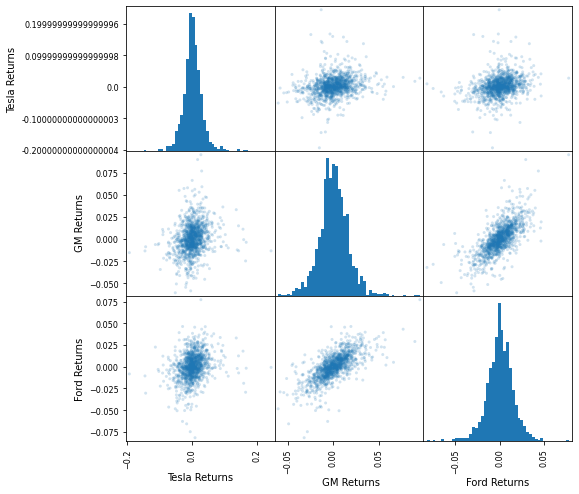

In [87]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

<AxesSubplot:xlabel=' GM Returns', ylabel='Ford Returns'>

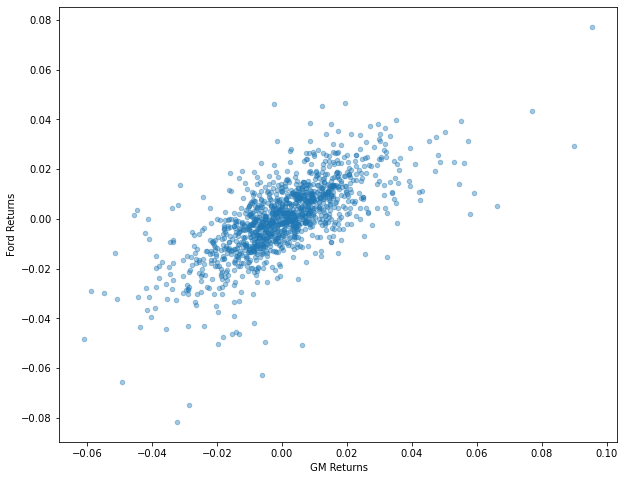

In [88]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

____
## Cumulative Daily Returns


** Create a cumulative daily return column for each car company's dataframe.**

In [89]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [90]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274,1.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664,1.041330
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354,1.052111
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686,1.060198


In [91]:
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

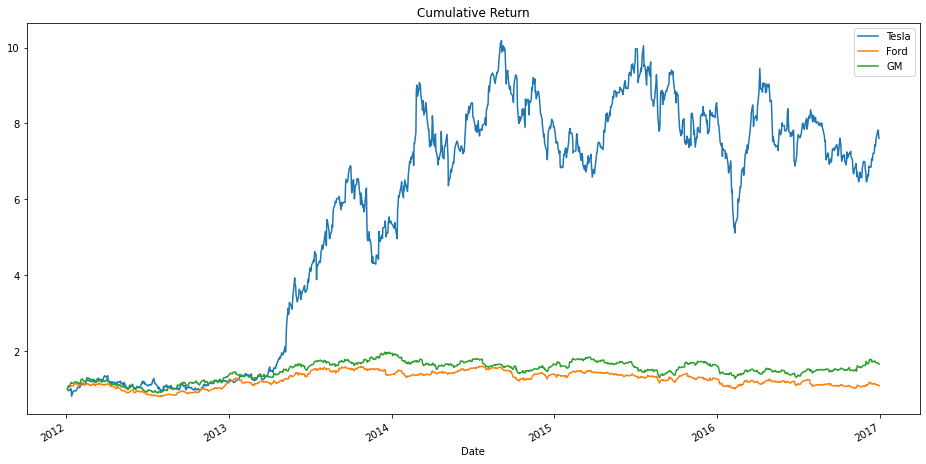

In [92]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()